In [1]:
import numpy as np
import cv2
import requests
import pandas as pd
import glob
import requests
import urllib.request
from io import BytesIO
from IPython.display import Image, display
from clip_retrieval.clip_client import ClipClient, Modality
from matplotlib import pyplot as plt
from deepface import DeepFace
from PIL import Image as PImg

In [2]:
# Function used to retrive images from the lion5B dataset 
def retrieveImages(text, aes_score, aes_weight, num_of_images):
    client = ClipClient(
        url="https://knn.laion.ai/knn-service",
        indice_name="laion5B-H-14",
        aesthetic_score=aes_score,
        aesthetic_weight=aes_weight,
        modality=Modality.IMAGE,
        num_images=num_of_images,
    )
    
    img_result = client.query(text)
        
    return img_result

In [37]:
#Alternate DeepFace implementation
def DeepFaceProcess(listOfImages):
    DeepFaceDict = {}
    counter = 0
    
    for imgIndex in range(len(listOfImages)):
        try:
            # Retrieving the age/gender/race/emotion of the image
            # Note: enforce_detection=False used so that images where the face isn't fully visible are still considered
            objs = DeepFace.analyze(listOfImages[imgIndex], actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False,  detector_backend = "mtcnn")
            
            print(len(objs))
            for index in range(len(objs)):
                if objs[index]['dominant_gender'] == "Man":
                    ImageInfo = {'age':objs[index]['age'], 'gender':"Male", 'race':objs[index]['dominant_race'], 'emotion':objs[index]['dominant_emotion']}
                elif objs[index]['dominant_gender'] == "Woman":
                    ImageInfo = {'age':objs[index]['age'], 'gender':"Female", 'race':objs[index]['dominant_race'], 'emotion':objs[index]['dominant_emotion']}
                
                # Cropping the image to only include the face
                objs[index]['region']
                x = objs[index]['region']['x']
                y = objs[index]['region']['y']
                width = objs[index]['region']['x'] + objs[index]['region']['w']
                height = objs[index]['region']['y'] + objs[index]['region']['h']
                croppedImg = list_of_images[imgIndex][y:height, x:width]
                
                # Storing the images in a dictionary 
                DeepFaceDict[counter] = [croppedImg,ImageInfo]
                counter+=1
        except Exception as error:
            counter-=1
            print(error)
        
    return DeepFaceDict

In [4]:
def ImageInfoDisplay(imageDict):
    for itemIndex in range(len(imageDict.items())):
    
        plt.imshow(imageDict[itemIndex][0])
        plt.axis('off')  # Hide the axes
        plt.show()
        
        text = ""
        
        if 'age' in imageDict[itemIndex][1]:
            text += "Age: " + str(imageDict[itemIndex][1]['age'])
        
        if 'gender' in imageDict[itemIndex][1]:
            text += "\nGender: " + str(imageDict[itemIndex][1]['gender'])
            
        if 'race' in imageDict[itemIndex][1]:
            text += "\nRace: " + str(imageDict[itemIndex][1]['race'])
            
        if 'emotion' in imageDict[itemIndex][1]:
            text += "\nEmotion: " + str(imageDict[itemIndex][1]['emotion'])
        print(text)

In [5]:
text = "Nurses facing the camera"
aes_score = 100
aes_weight = 100
num_of_images = 10
img_results = retrieveImages(text, aes_score, aes_weight, num_of_images)

In [6]:
# Storing the images in a list
list_of_images = []

# Retrieving the images from their respective url
for x in range(len(img_results)):
    image_url = img_results[x]['url']
    
    try:
        image_data = urllib.request.urlopen(image_url)
        
        # Read the downloaded image data
        image = plt.imread(image_data, format='jpg')
    
        list_of_images.append(image)
        
    except Exception as error:
        print(error)

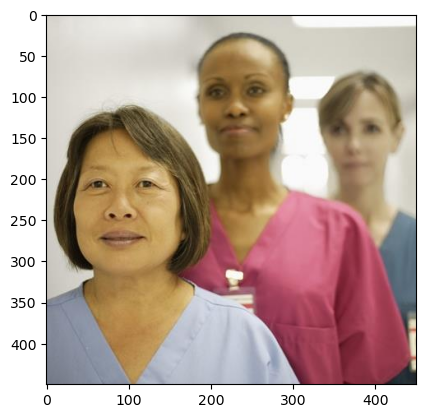

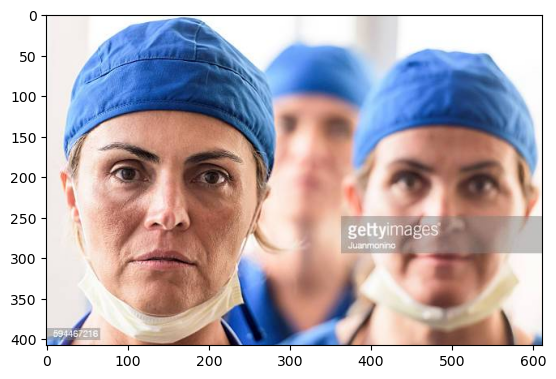

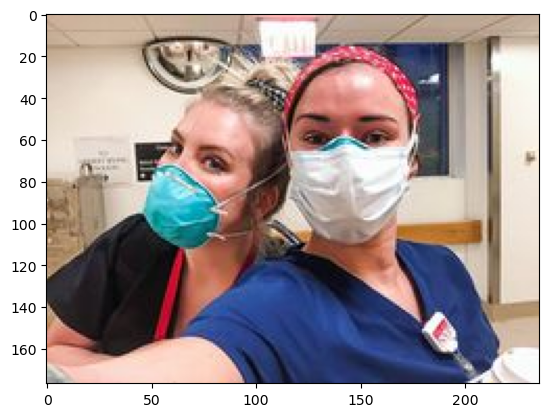

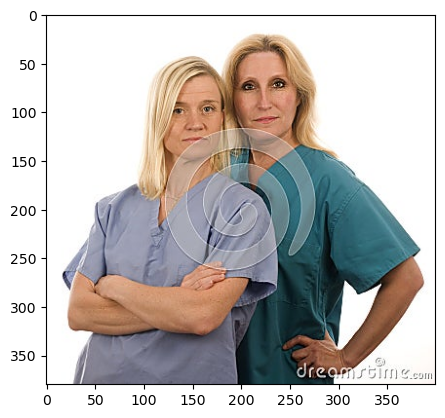

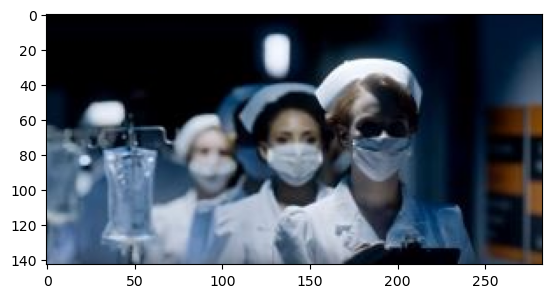

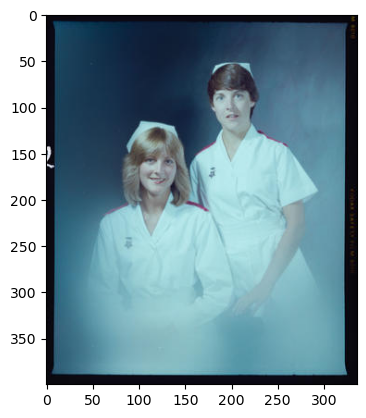

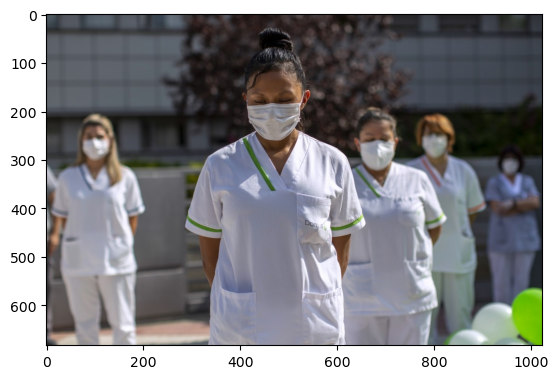

In [7]:
for img in list_of_images:
    plt.imshow(img)
    plt.show()

In [38]:
deepFaceDict = DeepFaceProcess(list_of_images)

1/1 [==============================] - 0s 20ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.58it/s]


3
1/1 [==============================] - 0s 19ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.12it/s]


2
1/1 [==============================] - 0s 18ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.13it/s]


1
1/1 [==============================] - 0s 17ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.32it/s]


1
1/1 [==============================] - 0s 21ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]


3
1/1 [==============================] - 0s 20ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  5.68it/s]


2
1/1 [==============================] - 0s 24ms/step


Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  6.82it/s]


2


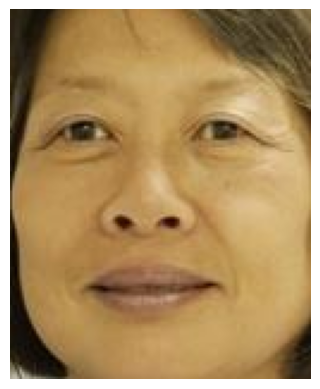

Age: 41
Gender: Male
Race: asian
Emotion: neutral


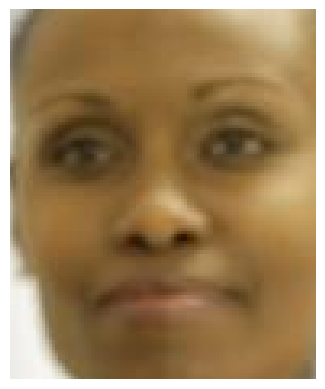

Age: 28
Gender: Female
Race: black
Emotion: neutral


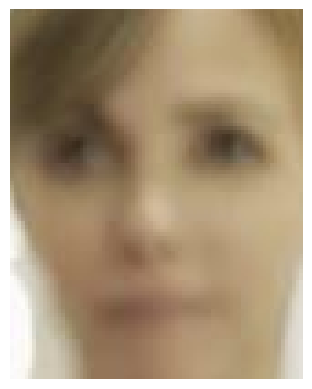

Age: 31
Gender: Female
Race: white
Emotion: sad


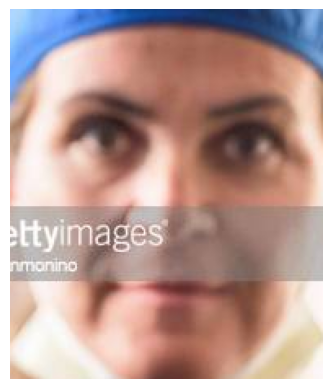

Age: 33
Gender: Male
Race: white
Emotion: neutral


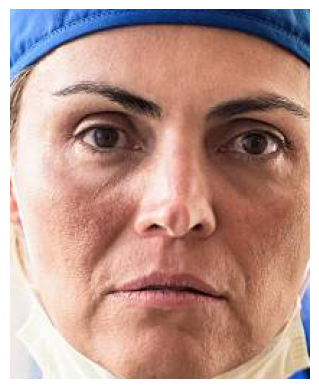

Age: 34
Gender: Female
Race: white
Emotion: sad


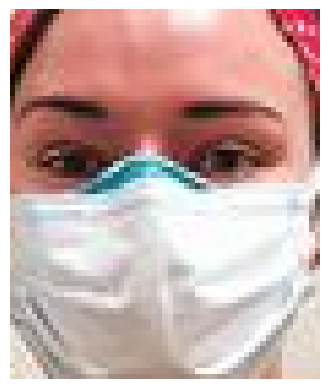

Age: 22
Gender: Male
Race: white
Emotion: sad


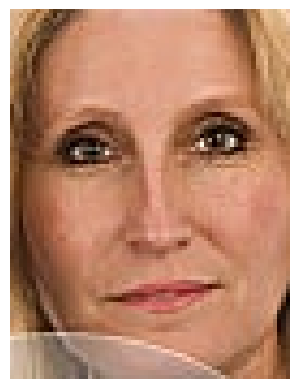

Age: 52
Gender: Female
Race: white
Emotion: neutral


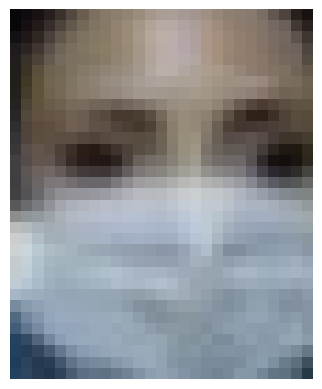

Age: 31
Gender: Male
Race: white
Emotion: angry


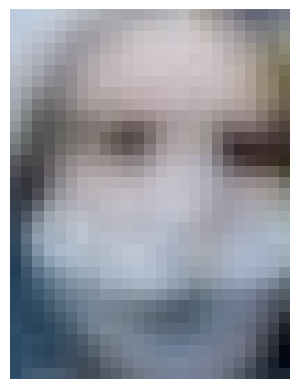

Age: 28
Gender: Female
Race: white
Emotion: fear


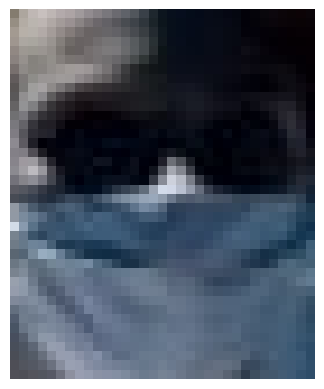

Age: 36
Gender: Male
Race: black
Emotion: neutral


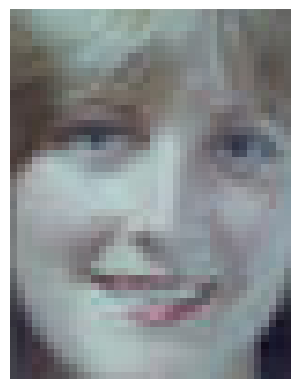

Age: 36
Gender: Female
Race: white
Emotion: happy


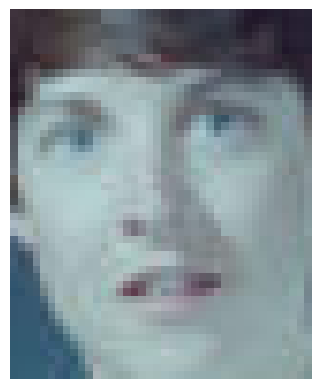

Age: 28
Gender: Male
Race: white
Emotion: neutral


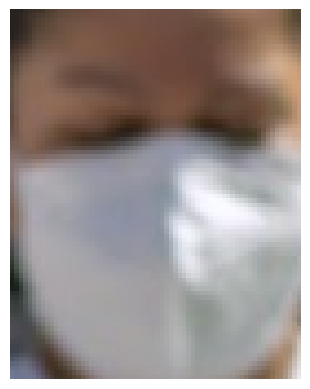

Age: 23
Gender: Male
Race: white
Emotion: fear


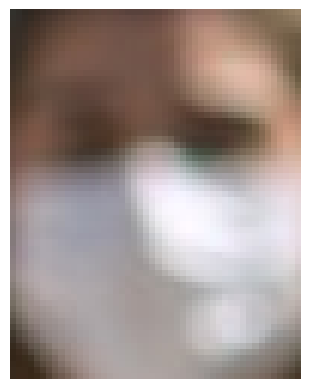

Age: 24
Gender: Male
Race: white
Emotion: sad


In [39]:
ImageInfoDisplay(deepFaceDict)

In [ ]:
# objs = DeepFace.analyze(list_of_images[0], actions = ['age', 'gender', 'race', 'emotion'], enforce_detection=False,  detector_backend = "mtcnn")

In [ ]:
# objs[0]['region']
# x = objs[0]['region']['x']
# y = objs[0]['region']['y']
# width = objs[0]['region']['x'] + objs[0]['region']['w']
# height = objs[0]['region']['y'] + objs[0]['region']['h']
# croppedImg = list_of_images[0][x:width, y:height]

In [ ]:
# plt.imshow(croppedImg)

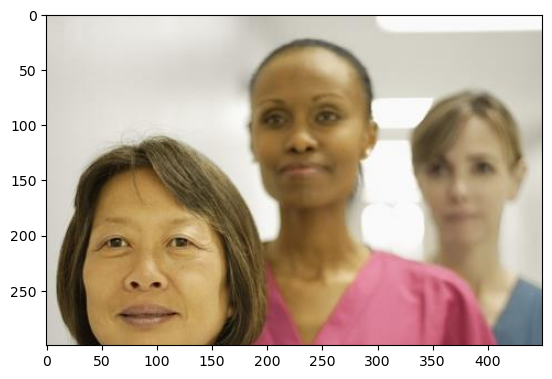

In [36]:
plt.imshow(list_of_images[0][0:300,0:1000])